---
# 데이터 가져오기

In [1]:
import pandas as pd
df1 = pd.read_csv('힙슐랭1기DB.csv', encoding='utf-8-sig')
df2 = pd.read_csv('힙슐랭2기DB.csv', encoding='utf-8-sig')
df3 = pd.read_csv('힙슐랭3기DB.csv', encoding='utf-8-sig')
df123 = pd.concat([df1,df2,df3])
# df123.columns
# help(df.drop)
# df1.shape
# df1 = df.drop_duplicates(['서비스/브랜드명'])
# df1.shape

df123.columns
df123.fillna(0, inplace=True)

df123.drop(['PICK','선정사례','마비(사례를 올려주신)','분석','임팩트(영향력)','선정 판단 지표','찜','계','Property'],axis=1, inplace=True)

In [2]:
df123.head()

,기수,주차,서비스/브랜드명,산업,내용(타이틀),마케팅 유형/방식,마케팅 채널,SUM,힙마비 원칙/HIP POINT
0,1기,7주차,왈도,콘텐츠,"마케팅 이야기, 왈도",콘텐츠 마케팅,유튜브,0.0,제품에 관련된 다양한 콘텐츠 생성
1,1기,7주차,탬버린즈,뷰티,"세심 끝판왕, 탬버린즈","공간 마케팅, 기타",오프라인매장,0.0,오프라인 공간에 브랜드의 가치를 담아 표현
2,1기,7주차,카카오페이지,콘텐츠,할아버지가 70살에 발레에 도전하게 된다면??,브랜디드콘텐츠,유튜브,0.0,이런 유튜버와 콜라보 어때요?
3,1기,7주차,대동여주도,주류,예쁜 술이 마시기도 좋다 - 대동여주도 연희로제,바이럴 캠페인,인스타그램,0.0,"제품에 관련된 다양한 콘텐츠 생성, 제품의 특성에 맞춘 마케팅"
4,1기,7주차,마이리얼트립,여행/숙박,마이리얼트립의 몬트리안 특별 프로모션,이벤트/프로모션,자사 APP,0.0,프로모션(이벤트/쿠폰)도 우리답게!


---
# 가장 많이 언급된 산업은?

In [3]:
zero_index = df123[df123['내용(타이틀)'].values==0].index

In [4]:
df123.drop(zero_index,axis=0,inplace=True)


In [5]:
df123_industry = df123['산업'].str.split(',')
# df123_industry
df123_industry = df123_industry.apply(lambda x : pd.Series(x))
# df123_industry
df123_industry.stack()
df123_industry = df123_industry.stack().reset_index(level=1,drop=True).to_frame('산업')
industry = df123_industry.value_counts().to_frame()
industry.head()
# df123_industry.sort_values
# df123_industry = df123.merge(df123_industry, left_index=True, right_index=True, how='left')
# df123_industry.head(40)

,0
산업,
식음료(F&B),317
의류/패션,172
IT,144
생활/라이프스타일,141
뷰티,113


In [6]:
industry = industry.reset_index()
industry.rename(columns={'산업':'산업',0:'개수'},inplace=True)

In [7]:
industry

,산업,개수
0,식음료(F&B),317
1,의류/패션,172
2,IT,144
3,생활/라이프스타일,141
4,뷰티,113
...,...,...
141,공연/콘서트,1
142,공연,1
143,건설,1
144,H&B,1


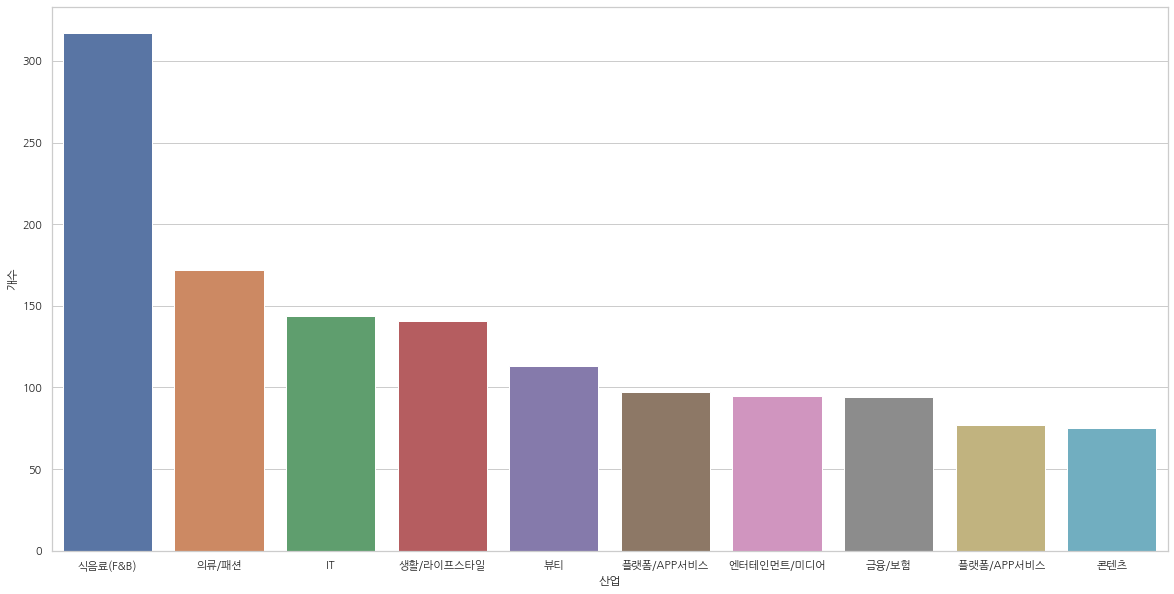

In [8]:
import matplotlib as plt
import seaborn as sns
# print(dir(sns))
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 23
plt.rcParams['figure.figsize'] = (20, 10)
ax = sns.barplot(x="산업", y="개수", data=industry.head(10))


---
# 가장 많이 언급된 기업은?

In [9]:
import pandas as pd
df1 = pd.read_csv('힙슐랭1기DB.csv', encoding='utf-8-sig')
df2 = pd.read_csv('힙슐랭2기DB.csv', encoding='utf-8-sig')
df3 = pd.read_csv('힙슐랭3기DB.csv', encoding='utf-8-sig')
df123 = pd.concat([df1,df2,df3])
# df123.columns
# help(df.drop)
# df1.shape
# df1 = df.drop_duplicates(['서비스/브랜드명'])
# df1.shape

df123.columns
df123.fillna(0, inplace=True)

df123.drop(['PICK','선정사례','마비(사례를 올려주신)','분석','임팩트(영향력)','선정 판단 지표','찜','계','Property'],axis=1, inplace=True)

In [10]:
df123.head()

,기수,주차,서비스/브랜드명,산업,내용(타이틀),마케팅 유형/방식,마케팅 채널,SUM,힙마비 원칙/HIP POINT
0,1기,7주차,왈도,콘텐츠,"마케팅 이야기, 왈도",콘텐츠 마케팅,유튜브,0.0,제품에 관련된 다양한 콘텐츠 생성
1,1기,7주차,탬버린즈,뷰티,"세심 끝판왕, 탬버린즈","공간 마케팅, 기타",오프라인매장,0.0,오프라인 공간에 브랜드의 가치를 담아 표현
2,1기,7주차,카카오페이지,콘텐츠,할아버지가 70살에 발레에 도전하게 된다면??,브랜디드콘텐츠,유튜브,0.0,이런 유튜버와 콜라보 어때요?
3,1기,7주차,대동여주도,주류,예쁜 술이 마시기도 좋다 - 대동여주도 연희로제,바이럴 캠페인,인스타그램,0.0,"제품에 관련된 다양한 콘텐츠 생성, 제품의 특성에 맞춘 마케팅"
4,1기,7주차,마이리얼트립,여행/숙박,마이리얼트립의 몬트리안 특별 프로모션,이벤트/프로모션,자사 APP,0.0,프로모션(이벤트/쿠폰)도 우리답게!


In [11]:
zero_index = df123[df123['내용(타이틀)'].values==0].index

In [12]:
df123.drop(zero_index,axis=0,inplace=True)

In [13]:
df123_company = df123['서비스/브랜드명'].str.split(',')
# df123_company
df123_company = df123_company.apply(lambda x : pd.Series(x))
df123_company
df123_company.stack()
df123_company = df123_company.stack().reset_index(level=1,drop=True).to_frame('서비스/브랜드명')
company = df123_company.value_counts().to_frame()
company.head()
# df123_company.sort_values
# df123_company = df123.merge(df123_company, left_index=True, right_index=True, how='left')
# df123_company.head(40)

,0
서비스/브랜드명,
배달의민족,40
토스,28
넷플릭스,26
당근마켓,23
마켓컬리,17


In [14]:
company = company.reset_index()
company.rename(columns={'서비스/브랜드명':'서비스/브랜드명',0:'개수'},inplace=True)

In [15]:
company

,서비스/브랜드명,개수
0,배달의민족,40
1,토스,28
2,넷플릭스,26
3,당근마켓,23
4,마켓컬리,17
...,...,...
1358,누데이크,1
1359,누깍,1
1360,농협,1
1361,노플라,1


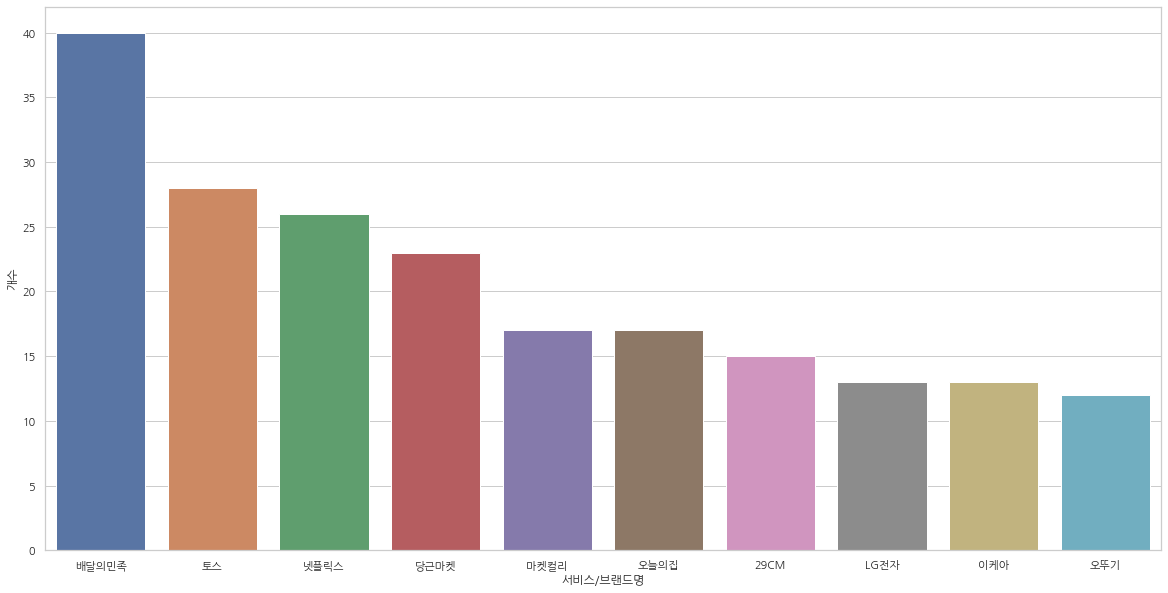

In [16]:
import matplotlib as plt
import seaborn as sns
# print(dir(sns))
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 23
plt.rcParams['figure.figsize'] = (20, 10)
ax = sns.barplot(x="서비스/브랜드명", y="개수", data=company.head(10))


# 매체는 ?

In [17]:
import pandas as pd
df1 = pd.read_csv('힙슐랭1기DB.csv', encoding='utf-8-sig')
df2 = pd.read_csv('힙슐랭2기DB.csv', encoding='utf-8-sig')
df3 = pd.read_csv('힙슐랭3기DB.csv', encoding='utf-8-sig')
df123 = pd.concat([df1,df2,df3])
# df123.columns
# help(df.drop)
# df1.shape
# df1 = df.drop_duplicates(['서비스/브랜드명'])
# df1.shape

df123.columns
df123.fillna(0, inplace=True)

df123.drop(['PICK','선정사례','마비(사례를 올려주신)','분석','임팩트(영향력)','선정 판단 지표','찜','계','Property'],axis=1, inplace=True)

In [18]:
df123.head()

,기수,주차,서비스/브랜드명,산업,내용(타이틀),마케팅 유형/방식,마케팅 채널,SUM,힙마비 원칙/HIP POINT
0,1기,7주차,왈도,콘텐츠,"마케팅 이야기, 왈도",콘텐츠 마케팅,유튜브,0.0,제품에 관련된 다양한 콘텐츠 생성
1,1기,7주차,탬버린즈,뷰티,"세심 끝판왕, 탬버린즈","공간 마케팅, 기타",오프라인매장,0.0,오프라인 공간에 브랜드의 가치를 담아 표현
2,1기,7주차,카카오페이지,콘텐츠,할아버지가 70살에 발레에 도전하게 된다면??,브랜디드콘텐츠,유튜브,0.0,이런 유튜버와 콜라보 어때요?
3,1기,7주차,대동여주도,주류,예쁜 술이 마시기도 좋다 - 대동여주도 연희로제,바이럴 캠페인,인스타그램,0.0,"제품에 관련된 다양한 콘텐츠 생성, 제품의 특성에 맞춘 마케팅"
4,1기,7주차,마이리얼트립,여행/숙박,마이리얼트립의 몬트리안 특별 프로모션,이벤트/프로모션,자사 APP,0.0,프로모션(이벤트/쿠폰)도 우리답게!


In [19]:
zero_index = df123[df123['내용(타이틀)'].values==0].index

In [20]:
df123.drop(zero_index,axis=0,inplace=True)

In [41]:
df123_company = df123['마케팅 채널'].str.split(',')
# df123_company
df123_company = df123_company.apply(lambda x : pd.Series(x))
df123_company
df123_company.stack()
df123_company = df123_company.stack().reset_index(level=1,drop=True).to_frame('마케팅 채널')
company = df123_company.value_counts().to_frame()
company.head()
# df123_company.sort_values
# df123_company = df123.merge(df123_company, left_index=True, right_index=True, how='left')
# df123_company.head(40)

,0
마케팅 채널,
인스타그램,454
유튜브,444
자사 APP,249
자사 홈페이지,176
자사 홈페이지,164


In [42]:
company = company.reset_index()
company.rename(columns={'마케팅 채널':'마케팅 채널',0:'개수'},inplace=True)

In [45]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
company

,마케팅 채널,개수
0,인스타그램,454
1,유튜브,444
2,자사 APP,249
3,자사 홈페이지,176
4,자사 홈페이지,164
5,인스타그램,163
6,오프라인,159
7,유튜브,93
8,오프라인매장,88
9,TV,74


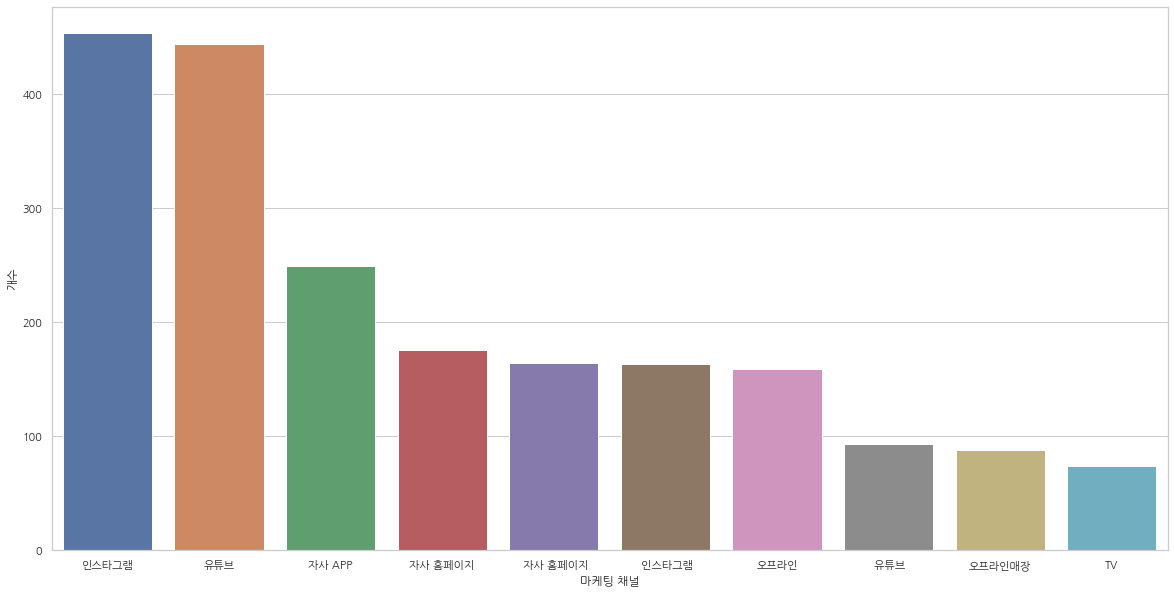

In [44]:
import matplotlib as plt
import seaborn as sns
# print(dir(sns))
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 23
plt.rcParams['figure.figsize'] = (20, 10)
ax = sns.barplot(x="마케팅 채널", y="개수", data=company.head(10))


# 마케팅 유형은?